# Transfer learning in text classification
Jen Seale, CUNY Graduate Center, Spring 2019<br>
jseale@gradcenter.cuny.edu

#### Abstract
This research implements transfer learning in text classification for the MM-IMDB movie genre prediction task, set forth by Arevalo et al. (2017). Using the ULMFiT methodology (Howard and Ruder 2018) on the wikitext-103 English language model (an AWD-LSTM developed by Merity et al. 2017, and implemented by Howard and Ruder 2018) with the MM-IMDB title and plot summary data, and genre classifications (Arevelo et al. 2017), an Fbeta score of 74.1 is obtained, outperforming Arevelo et al.'s (2017) micro F score of 63.0, and Keila et al.'s (p.c., 2018) micro F score of 62.3, the highest scores obtained with image and text model fusion, which outranked solely text, and solely image model performance at the time.

## I. Introduction


## II. Literature review
In Arevelo et al. (2017) uni- and bi-modal genre classification experiments on images (movie posters) and text (movie plots) in the MM-IMDb dataset are performed and it is found that bimodal classifiers, acting on inherently bimodal resources (movies represented by plot summaries and posters), outperform unimodal models which take as input either the text or the images. Their best performance on the MM-IMDb task is a 63.0 micro F-measure score, achieved with a gated multimodal unit (GMU)—it is also the highest recorded score on this task in the literature reviewed herein, and attested to in Keila et al. (2018) and Weisen and HaKoen-Kerner (2018). _The micro F-measure is used as it accounts for label imbalance within the training set. It's calculated using raw counts of true positives, false negatives and false positives, as opposed to per-category F1 averages (Pedregosa et al. 2011)._

The gating in Arevalo et al.'s GMU learns which features from text and image submodules input aid most in the classification task. To determine which text representation submodule to use in their GMU, they evaluate a n-gram model (following Kanaris & Stamatatos 2009), a word2vec model (following Mikolov et al. 2013), and two RNN models (one which takes word2vec embeddings as inputs, and another that learns word vectors from randomly initialized parameters). They find their best scoring text submodule to be the RNN with word2vec embeddings, which they call the MaxoutMLP_w2v, and use in their high scoring GMU. To evaluate and choose this text module they compare performance against Kanaris and Stamatatos' (2009) character-based n-gram models on the KI-04 dataset and the 7genre, multi-class, single-label datasets. They record the MaxoutMLP_w2v achieves _state-of-the-art_ results on the KI-04, and outperforms Kanaris and Stamatatos' F1 of 84.1 with an 85.4 on the 7genre dataset. On the multi-label MM-IMDb text data classification task, their MaxoutMLP_w2v performs with an 59.5 micro F1. The MM-IMDb text they use consists of movie plots that average 92.5 words, and have, on average 2.48 associated genres. Their worst scoring text classification module on the MM-IMDb movie plot dataset is the RNN that learned from scratch, achieving a 49 micro F1, which they attribute to the lack of training data used compared to that used in the development of the word2vec embeddings.

Kiela et al.'s (2018) research provides accuracy scores for a number of different models on the MM-IMDb task, and also concludes that multimodal models outperform unimodal models on the task. Their work, in conjunction with Arevalo et al. (2017), provides the baseline for this study, in which a unimodal text classifier outperforms the top performing multimodal, and unimodal models in their studies.

The accuracy (micro F1, Kiela, p.c.) for Kiela et al.'s (2018) fastText model (providing a baseline as a text-only unimodal model) is recorded at 58.8 ± 0.1. The fastText classifier treats input texts as embedded bag of n-gram features that are then averaged into a hidden layer and fed to linear classifier with hierarchical softmax activation over the classes (Joulin et al. 2016). Accuracy on the MM-IMDb task for their continuous, non-discretized bimodal models, which incorporate the fastText model for language representation, goes from 61.0 ± 0.0 to 62.3 ± 0.2 (averaged over five runs).

Genre prediction on other, similar, text-only, IMDb datasets has been performed, all with accuracy results that are outperformed by the text classifier developed in this research. Hoang (2018) developed the following multilabel classifiers, reported here with their F-scores, over the plot summaries of 250,000 IMDb movies: a Multinomial Naive Bayes classifier, trained with CBOW features had an F1 of 53.0, his XGBoost classifier, using word2vec features as inputs, 49.0, and a Multinomial Gated Recurrent Unit had a 56.0. Nyberg's (2018) K-nearest neigbors movie genre classifier, acting over movie review text for IMDb movies, outperformed a neural net with tf-idf as input with an accuracy score of 55.4. Ho (2011) compared four movie genre classification methods over the IMDb movie plot summaries and genres provided at https://www.imdb.com/interfaces/: a one-v-all SVM, a multilabel K-nearest neighbor (KNN), a parametric mixture model, and a three layer neural net with sigmoid activation function and regularized cost function the input of which consisted of tf-idf vectors mapped to a PCA-dimension-reduced space. Ho records an F measure of 54.9 for his best model, an SVM with L2-regularized L1 loss and a default penalty of one. Kohli (2017) also achieves his best F measure on a multilabel IMDb genre classification task using a SVM with tf-idf input—a 55. His work compares variations of KNNs, SVMs, and logistic regression models. One interesting approach to genre classification incorporates modeling of emotion in plot synopsis, but the highest micro F1 achieved by Kar et al (2018) is a 37.8. 

The unimodal model in this research reduces the error of these other models by ~15% (compared to Arevalo's 2017 best GMU F score) and more. This is attributed to the transfer learning technique employed in the fine-tuning method developed by Howard and Ruder (2018), _Universal Language Model Fine-tuning for Text Classification_ (ULMFiT). 

##### Universal Language Model Fine-tuning for Text Classification
Howard and Ruder (2018) address issues in the initialization of weights in transfer learning for text classification models, in that pre-trained word embeddings such as Mikolov et al.'s (2013) are often treated as fixed parameters and either used in a model's first layer, or are concatenated at different layers (Peters et al., 2017; McCann et al., 2017; Peters et al., 2018); leaving most of a model's parameters randomly initialized. A more robust initialization of classifier parameters using the transfer of language model (LM) weights proved effective in Dai and Le (2015), but required millions of documents with text from within the classification domain to avoid overfitting. 

Howard and Ruder (2018) improve upon this idea of finetuning a LM as a classifier by introducing a method they have coined _Universal Language Model Fine-tuning for Text Classification_ (ULMFiT). In ULMFiT, weights for a general domain language model (a model that predicts the next word in a sentence) are first developed. That language model is then fine-tuned, again as a language model, on text from a domain of interest, and then it is again fine-tuned, finally as a text classifier, for that domain. 

While the ULMFiT method incorporates domain-specific training, Howard and Ruder consider it _universal_, because, unlike in Peters et al. (2018), in which custom architectures are used for different tasks, a single architecture and training process can be used across tasks that vary in the number and size of documents, as well as in label types.

The _wikitext103_ model, used in this research as the general domain model is provided in the fastai library (Howard and others, 2018) and is developed by Merity et al. (2017) over the WikiText-103 dataset, also made available by Merity et al. (2016): this dataset is greater that 110 times the size of the Penn Treebank, and contains over 100 million tokens from full, verified Good and Featured Wikipedia articles with all numbers, punctuation and original case intact. Further discussion of the techniques used to develop the model, and its archicture, are covered in section V.

Howard and Ruder describe their fine-tuning techinque as _discriminative_ (Discr) and use what they call _slanted triangular learning rates_ (STLR) in order to retain previously learned, low-level language features while developing higher level, domain- and classification-specific features. Citing Yosinski et al. (2014), that different layers of the net represent different types of language features, with higher level features encoded in the last layers, Howard and Ruder employ different learning rates (LRs) for each of the layers—starting with the largest learning rate on the last layer (the layer representing the highest level of information)—and divide each subsequent layer's learning rate by 2.6 to retain more of the most general data representation in the lower levels. The rational behind using 2.6 as the dividend is that it empirically produces better results. They further manipulate the learning rate this generally decreasing LR by employing their slanted triangular (STLR) technique (a modification on Smith's 2017 triangular LR) which linearly increases the LR for a brief time and then introduces a slow linear decay.


## III. Experiment design
Howard and Ruder's (2018) ULMFiT method is used to fine-tune a pretrained language model, WT103 (Merity et al. 2017; 2018), on the Arevalo et al. (2017) MM-IMDB dataset text, which is then used to create a custom classifier trained on the text and corresponding genres.

## IV. Data
Text from the 25,959 movies in the MM-IMDB dataset made available by Arevelo et al. (2017) is used for this project. This section provides a description of the original dataset, the modifications made to the data for this research, and the resulting dataset. 

[NOTE: When checking the original dataset numbers in this work against those reported by Arevalo, I found discrepencies, but I haven't been able to dl the dataset again to see if I could duplicate his numbers. Will continue to try.]

From the .json file, the 'genres' field provides the human-applied movie genres, and the 'title' and 'plot' field provide the text. The .jpeg file provides the movie poster image data which will be fused with the text data in training an prediction of the genres. 

In [4]:
#Makes data paths
import os
import json

path = os.path.abspath('{}/../'.format('transfer_learning_text_classification.ipynb') )
data_path = '{}/data/mmimdb/dataset/'.format(path)
make_data_path = '{}/data/mmimdb/'.format(path)

An example of the human-applied genres, the title, and the text that comprises the plot summary, prior to any cleaning or tokenization is printed below.

In [5]:
#Prints example of movie data
with open('{}0399877.json'.format(data_path)) as json_data:
    data = json.load(json_data)
    print(data['genres'])
    print(data['title'])
    print(data['plot'])

['Documentary', 'Comedy', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi']
What the #$*! Do We (K)now!?
['"WHAT THE #$*! DO WE KNOW?!" is a radical departure from convention. It demands a freedom of view and greatness of thought so far unknown, indeed, not even dreamed of since Copernicus. It\'s a documentary. It\'s a story. It\'s mind-blowing special effects. This film plunges you into a world where quantum uncertainty is demonstrated - where neurological processes, and perceptual shifts are engaged and lived by its protagonist - where everything is alive, and reality is changed by every thought.', "Amanda, a divorced photographer, finds herself in a fantastic Alice-in-Wonderland experience when her daily, uninspired life literally begins to unravel, revealing the cellular, molecular and even quantum worlds which lie beneath. Guided by a Greek Chorus of leading scientists and mystics, she finds that if reality itself is not questionable, her notion of it certainly is. Stunning special effects

A csv file, with a row per movie, where the human-applied movie genres for each of the movies, and their corresponding title and plot text live, and was created from the files provided in the MM-IMDB dataset using make_data.py. 

This csv format is used by the fastai library to further prepare the data to finetune the wikitext103 language model with the language used in the MM-IMDB movie reviews, and then to train the movie genre classifier.

In [6]:
#Run this cell to view the csv-making functionality
import sys
sys.path.insert(0, make_data_path)
import make_data

??make_data.texts_csv

The first five rows of the csv are printed below. You can see the human-applied movie genres, the targets to be predicted, are space-separated in one column of the csv. While there can be multiple genres per film, one genre is also possible. For each movie, the title of the movie appears before the plot summary in the text column—the title and the plot are space separated.

In [7]:
import pandas as pd
texts_df = pd.read_csv(make_data_path+"text_labels.csv")
texts_df.head()

,text,tags,tag count,plot_word_count
0,He Knows You're Alone A reluctant bride to be ...,Horror Thriller,2,101
1,Link Student Jane jobs as an assistant for the...,Horror,1,95
2,The Blacksmith Buster clowns around in a black...,Comedy,1,53
3,"Take the Lead In New York, the polite dance in...",Drama Music,2,316
4,Ping-pongkingen Rille is coming of age in a Sw...,Drama,1,149


The csv, as seen below, contains 25,959 rows—one row for every movie in the dataset.

In [8]:
texts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25951 entries, 0 to 25950
Data columns (total 4 columns):
text               25951 non-null object
tags               25917 non-null object
tag count          25951 non-null int64
plot_word_count    25951 non-null int64
dtypes: int64(2), object(2)
memory usage: 811.0+ KB


### Data descriptive statistics and modifications
This section provides descriptive statistics on the original dataset, makes modifications to the original dataset to remove genres that are applied to the lower 25th percentile of movies, as well as duplicates. 

#### Genres
There are 27 movie genres in the dataset. They are as follows, along with counts of how many times they are applied to movies.

In [9]:
import glob
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

genres = []
genre_count = {}

sys.path.insert(0, data_path)
for file in glob.glob('{}*.json'.format(data_path)):
    data = json.load(open(file))
    [genres.append(genre) for genre in data['genres']]

counts = Counter(genres)

In [10]:
counts_df = pd.DataFrame.from_dict(list(dict(counts).items()))
counts_named_df = counts_df.rename(columns={0:'Genre',1: '# Movies'})
counts_ordered_df = counts_named_df.sort_values(by='# Movies')

In [11]:
counts_ordered_df

,Genre,# Movies
25,Reality-TV,1
22,Talk-Show,2
26,Adult,4
18,News,64
23,Film-Noir,338
3,Short,471
24,Sport,634
20,Western,705
12,Musical,841
17,Animation,997


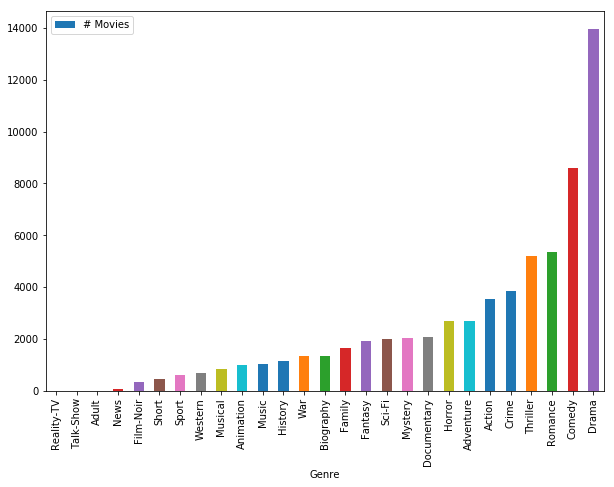

In [12]:
counts_ordered_df.plot(x='Genre', y='# Movies', kind='bar', figsize=(10,7))

Prior to removing genres in the lower 25th percentile from the dataset, in which outlier genres with as little as one representative movie exist, the dataset has a mean of 2,391 movies per genre over 27 genres, with a standard deviation from the mean of 3,039 movies. The median number of movies per genre is 1,343. See below for the descriptive statistics as generated by pandas _describe_ method.

In [13]:
counts_ordered_df['# Movies'].describe()

count       27.000000
mean      2391.481481
std       3039.278727
min          1.000000
25%        669.500000
50%       1343.000000
75%       2706.500000
max      13967.000000
Name: # Movies, dtype: float64

After removing genres in the lower 25th percentile, there are, on average, 3,152 movies per genre over 20 genres, with a standard deviation of 3,203. The median number of movies per genre is 2,024. 75th percentile and above genres are retained due to their importance in the general task of predicting movie genres. 

Below, the number of movies per genre within the new subset of 20 genres is confirmed.

In [14]:
lower_25th_percentile_genres_removed = counts_ordered_df[counts_ordered_df['# Movies'] > counts_ordered_df['# Movies'].quantile(.25)]

In [15]:
lower_25th_percentile_genres_removed

,Genre,# Movies
20,Western,705
12,Musical,841
17,Animation,997
5,Music,1045
9,History,1143
11,War,1335
21,Biography,1343
19,Family,1668
15,Fantasy,1933
16,Sci-Fi,1991


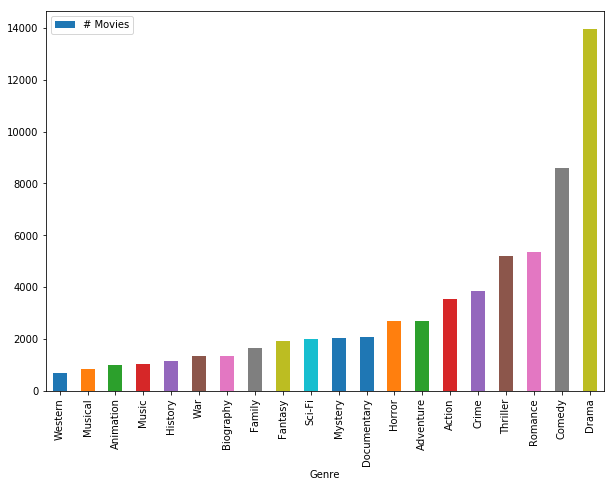

In [16]:
lower_25th_percentile_genres_removed.plot(x='Genre', y='# Movies', kind='bar', figsize=(10,7))

In [17]:
lower_25th_percentile_genres_removed['# Movies'].describe()

count       20.000000
mean      3152.800000
std       3203.948544
min        705.000000
25%       1287.000000
50%       2024.000000
75%       3622.000000
max      13967.000000
Name: # Movies, dtype: float64

#### Genres modification
Above it was determined what the dataset would look like with the lower 25th percentile genres removed. Below those genres are removed from the dataset.

In [18]:
genres_to_remove = ['Reality-TV', 
                    'Talk-Show', 
                    'Adult', 
                    'News', 
                    'Film-Noir', 
                    'Short', 
                    'Sport']

In [19]:
texts_lower_genres_rm_df = texts_df.dropna()

In [20]:
texts_lower_genres_rm_df['tags'] = texts_lower_genres_rm_df.tags.apply(lambda tags: 
                                                                       ' '.join([tag for tag in tags.split() 
                                                                                 if tag not in genres_to_remove]))

/home/ubuntu/anaconda3/envs/gmu_bimodal/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
texts_lower_genres_rm_df.head()

,text,tags,tag count,plot_word_count
0,He Knows You're Alone A reluctant bride to be ...,Horror Thriller,2,101
1,Link Student Jane jobs as an assistant for the...,Horror,1,95
2,The Blacksmith Buster clowns around in a black...,Comedy,1,53
3,"Take the Lead In New York, the polite dance in...",Drama Music,2,316
4,Ping-pongkingen Rille is coming of age in a Sw...,Drama,1,149


In [22]:
texts_lower_genres_rm_df.describe()

,tag count,plot_word_count
count,25917.000000,25917.000000
mean,2.432072,164.573523
std,1.176500,146.640064
min,1.000000,3.000000
25%,2.000000,66.000000
50%,2.000000,120.000000
75%,3.000000,216.000000
max,10.000000,1900.000000


As can be seen above, eight movie summary texts are not unique. Duplicates are removed below. 

In [23]:
texts_no_dups_df = texts_lower_genres_rm_df.drop_duplicates(subset='text')

In [24]:
texts_no_dups_df.head()

,text,tags,tag count,plot_word_count
0,He Knows You're Alone A reluctant bride to be ...,Horror Thriller,2,101
1,Link Student Jane jobs as an assistant for the...,Horror,1,95
2,The Blacksmith Buster clowns around in a black...,Comedy,1,53
3,"Take the Lead In New York, the polite dance in...",Drama Music,2,316
4,Ping-pongkingen Rille is coming of age in a Sw...,Drama,1,149


In [25]:
texts_no_dups_df.describe()

,tag count,plot_word_count
count,25917.000000,25917.000000
mean,2.432072,164.573523
std,1.176500,146.640064
min,1.000000,3.000000
25%,2.000000,66.000000
50%,2.000000,120.000000
75%,3.000000,216.000000
max,10.000000,1900.000000


In [26]:
texts_tag_counts = texts_no_dups_df
texts_tag_counts.loc[:, 'tag_count'] = texts_tag_counts.tags.apply(
                                        lambda x: len(x.split(' ')))

In [27]:
texts_tag_counts.describe()

,tag count,plot_word_count,tag_count
count,25917.000000,25917.000000,25917.000000
mean,2.432072,164.573523,2.432072
std,1.176500,146.640064,1.176500
min,1.000000,3.000000,1.000000
25%,2.000000,66.000000,2.000000
50%,2.000000,120.000000,2.000000
75%,3.000000,216.000000,3.000000
max,10.000000,1900.000000,10.000000


### Plot summary text descriptive statistics
Im the modified dataset with 20 movie genres, and movies with duplicate text summaries removed, 25,917 movies are represented. On the average each movie plot summary as 164 words, with a standard deviation of 146 words from the mean. The median number of words in a movie plot summary is 120. The smallest number of words in a movie plot summary is 3 words, while the largest is 1900 words. The title is always included in the summary at the beginning of the summary.

In [28]:
texts_tag_word_counts = texts_tag_counts
texts_tag_word_counts.loc[:, 'plot_word_count'] = texts_tag_counts.text.apply(
                                        lambda x: len(x.split(' ')))

In [29]:
texts_tag_word_counts['plot_word_count'].describe()

count    25917.000000
mean       164.573523
std        146.640064
min          3.000000
25%         66.000000
50%        120.000000
75%        216.000000
max       1900.000000
Name: plot_word_count, dtype: float64

In [30]:
texts_tag_word_counts.head()

,text,tags,tag count,plot_word_count,tag_count
0,He Knows You're Alone A reluctant bride to be ...,Horror Thriller,2,101,2
1,Link Student Jane jobs as an assistant for the...,Horror,1,95,1
2,The Blacksmith Buster clowns around in a black...,Comedy,1,53,1
3,"Take the Lead In New York, the polite dance in...",Drama Music,2,316,2
4,Ping-pongkingen Rille is coming of age in a Sw...,Drama,1,149,1


### Data summary

Eight movie summaries were removed from the original dataset with 25,959 movies due to text summary duplication. There are 25,951 genre-labeled movie summaries in the final, modified dataset. On average there are ~2 human-labeled genres per movie, and each movie summary (which includes the movie title) has ~164 words. 

Seven genres were removed from the original dataset with 27 movie genres due to the genres' application to movies in the lower 25th percentile of tagged movies. There are 20 genres in the final dataset. On average, there are 3,152 movies per genre. _Drama_, _Comedy_, and _Romance_ are the top-most labeled genres, while _Animation_, _Musical_ and _Western_ are used the least.

Further work will be done on the data (e.g., tokenization, numericalization) to prepare it for the language model and subsequently developed text classifier, and is covered in depth in section V. 

In [31]:
texts_tag_word_counts.to_csv("{}text_mod_labels.csv".format(make_data_path),index=False)

## V. Experiment

#### Text classifier metrics
As the classification problem we are facing is a multilabel problem, where each text can have multiple genres, it affects model design and metrics. The model is discussed in the Language Model section and the metrics, here. Performance is scored on two fastai metrics, accuracy_thresh and fbeta.

##### accuracy_thresh
accuracy_thresh could be considered, the 'accuracy of the model's predictions above a certain threshold', and is computed only when the number of predictions our model makes matches the number of human-applied labels provided in the MM-IMDB dataset.

The language classifier model uses a final sigmoid activation function [TO DO: ISOLATE THE SIGMOID FUNCTION IN THE RNN CODE] outputing a confidence score for any of the 26 possible genre labels [TO DO: DETERMINE WHY THE BIAS IS INCLUDED IN THE FINAL RNN LAYER] between 0 and 1—and our model is set to consider anything above a .5 threshold as a match between the predicted and actual labels. Again, for each movie, the accuracy_thresh measure is computed using only the predictions where the number of predicted labels matches the number of applied labels. The average of the accuracy_thresh scores is then computed for the entirety of training dataset and recorded per training epoch. The accuracy_thresh obtained during the final training epoch for the experiment conducted on January 21, 2019 is 93.4.

##### fbeta
fbeta is the F1 score computed using the weighted harmonic mean of the model's precision and recall. This is the score compared, in this research, to Arevalo et al. (2017), and Kiela et al.s' (2018) GMU micro F1 scores recorded on the same task, with the same data. 

In the fbeta/F1 score, the beta parameter acts as a weight that promotes either precision or recall in the combined score. A beta over 1 promotes recall, under 1 promotes precision, at 0 considers only precision and as it reaches infinity considers only recall. (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html)

The beta parameter used in the model's fbeta is 2, meaning the metric favors recall slightly over precision.

_Recall_ is defined as the number of true positives over the number of true postives plus false negatives. What does that mean? It means that you're measuring the percent you got right out of all that you should have gotten right. _Precision_ is defined as the number of true positives over the number of true positives plus false positives. What does that mean? It means you're measuring the percent of all the predictions you got right out of the ones you made. _Recall_ can therefore be considered a more stringent metric, and the model's beta parameter favoring recall slightly means that the measurement is a bit stricter than if it favored, or only took into consideration, precision.

The fbeta obtained during the final training epoch for the experiment conducted on January 21, 2019 is 71.0. This means that by employing Howard and Ruder's (2018) ULMFiT method on the WT103_1 English language model (Merity et al. 2017, Howard and Ruder 2018) with the MM-IMDB title and plot summary data, and genre classifications (Arevelo et al. 2017), we already see higher accuracy performance than the fusion models previously employed on the same classification task and data; and the fusion models were outperforming text-only models (Kiela et al. 2018).

### Language model


###### Libraries
The model is built using the PyTorch 1.0.0 (Paszke et al. 2017) and fastai 1.0.40 (Howard et al. 2018) libraries. 

In [49]:
import torch
import fastai
from fastai.text import * 

###### Hardware
The model is trained on an AWS EC2 p2.xlarge persistent spot instance, using one GPU. 

In [50]:
#USE GPU - Device 0 
torch.cuda.set_device(0)

#### Loading the data
The fastai TextLMDataBunch.from_csv() (TextLanguageModelDataBunch) takes in the movie summaries and ignores genres, as the target for this model is always the next word in a sentence.  It tokenizes the language data, adds some additional tokens (described in greater detail below), numericalizes the tokens, and creates one array of all the data, which is then split into contiguous batches with (line length) sequences of size _bptt_, which defaults to 70. The order of the sentences in the summaries is retained.

##### Additional Tokens
_xxbos_ marks the beginning of a sentence.<br>
_xxmaj_<br>
_xxunk_<br>
_xxup_<br>

In [51]:
# Language model data
#https://docs.fast.ai/text.html
data_lm = TextLMDataBunch.from_csv(make_data_path, 'text_mod_labels.csv', text_cols = 'text')
data_lm.save()
data_lm = TextLMDataBunch.load(make_data_path) #TextLMDataBunch expects to find data_lm saved to a temp directory

In the next few cells provide a closer look at the _TextLMDataBunch_ instance that will be fed to the language model.

In [52]:
data_lm

TextLMDataBunch;

Train: LabelList
y: LMLabel (20733 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /home/ubuntu/gmu_bimodal/data/mmimdb
x: LMTextList (20733 items)
[Text xxbos xxmaj xxunk de un crimen a bizarre black comedy about a man whose overwhelming ambition in life is to be a renowned serial killer of women , and will stop at nothing to achieve it - but not everything goes according to plan ... xxmaj archibaldo de la xxmaj cruz tells in the police station the story about the murder of a woman , which he insists to be the author . xxmaj he 's a talented potter , with refined manners but mentally unstable . xxmaj one night , he says , he went to spent the night in a casino , where he met a beautiful woman . xxmaj after having a fight with her lover , the woman crashes her car and xxmaj de la xxmaj cruz offers to ride her home , place where he thinks he committed the murder . xxmaj archibaldo 's engaged with a pretty and very catholic girl , but before

In [53]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

In [54]:
x,y = next(iter(data_lm.train_dl))
example = x.cpu()
texts = pd.DataFrame([data_lm.train_ds.vocab.textify(l).split(' ') for l in example])
texts

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,xxbos,xxmaj,the,xxmaj,landlord,xxmaj,at,the,age,of,twenty,-,nine,",",xxmaj,elgar,xxmaj,enders,"""",runs,away,"""",from,home,.,xxmaj,this,running,away,consists,of,buying,a,building,in,a,black,ghetto,in,the,xxmaj,park,xxmaj,xxunk,section,of,xxmaj,brooklyn,.,xxmaj,initially,his,intention,is,to,evict,the,black,tenants,and,convert,it,into,a,posh,flat,.,xxmaj,but,xxmaj
1,fake,xxunk,",",spinning,information,",",leaking,information,and,documents,",",and,doctoring,documents,.,xxmaj,these,manoeuvrings,are,most,important,in,the,lead,up,to,the,xxup,un,vote,on,the,issue,.,a,political,satire,about,a,group,of,skeptical,xxmaj,american,and,xxmaj,british,operatives,attempting,to,prevent,a,war,between,two,countries,.,xxbos,xxmaj,blue,xxmaj,city,xxmaj,returning,to,the,small,xxmaj,florida,town
2,just,left,xxmaj,roxy,",",the,sisters,both,eventually,further,learning,that,it,is,because,he,has,fallen,in,love,with,another,woman,",",who,is,herself,married,.,xxmaj,roxy,and,xxmaj,charles,-,xxmaj,henri,deal,with,their,break,-,up,",",which,xxmaj,roxy,does,not,want,but,must,face,the,legal,consequences,of,",",including,determining,the,ownership,of,what,may,be,a,valuable,xxmaj,french
3,.,xxmaj,but,an,abrupt,detour,through,a,space,time,wormhole,lands,him,on,a,strange,planet,where,talking,apes,rule,over,the,human,race,.,xxmaj,with,the,help,of,a,sympathetic,chimpanzee,activist,named,xxmaj,ari,and,a,small,band,of,human,rebels,",",xxmaj,leo,leads,the,effort,to,evade,the,advancing,xxmaj,gorilla,xxmaj,army,led,by,xxmaj,general,xxmaj,xxunk,and,his,most,trusted,warrior
4,ripley,",",along,with,a,crew,of,smugglers,that,unknowingly,helped,in,delivering,hosts,to,breed,the,alien,species,",",must,now,escape,the,perilous,ship,.,xxmaj,along,the,way,",",xxmaj,ripley,encounters,a,shocking,revelation,that,truly,sets,herself,against,both,humanity,and,the,alien,species,.,xxmaj,she,must,now,decide,what,she,truly,is,",",in,order,to,save,humanity,once,more,.,xxmaj,two
5,of,generic,70s,",",80s,and,90s,xxup,tv,shows,of,various,genres,slowly,turns,into,an,absurdist,meta,slasher,and,then,the,parody,becomes,even,weirder,.,xxbos,xxmaj,the,xxmaj,teahouse,of,the,xxmaj,august,xxmaj,moon,xxmaj,this,comedy,-,drama,is,partially,a,gentle,satire,on,xxmaj,america,'s,drive,to,change,the,world,in,the,post,-,war,years,.,xxmaj,one,year,after,xxmaj
6,ruby,",",but,he,can,not,tell,her,.,xxmaj,he,is,also,a,bit,old,to,keep,on,boxing,",",but,its,the,only,thing,he,does,well,.,xxmaj,johnny,xxmaj,walker,is,a,drifting,cowboy,and,boxer,on,the,path,of,self,-,destruction,.,xxmaj,he,'s,tough,",",with,a,very,short,fuse,",",and,has,a,habit,of,spitting,on,people,who,give,him
7,past,behind,",",he,decides,to,start,working,for,the,xxmaj,xxunk,xxmaj,trucking,company,",",which,transports,gravel,.,xxmaj,it,'s,an,aggressive,company,",",where,speed,is,everything,.,xxmaj,doing,too,few,runs,in,a,day,?,xxmaj,you,'re,out,.,xxmaj,red,is,the,most,experienced,trucker,;,he,can,do,18,runs,in,a,day,.,xxmaj,tom,soon,makes,friends,with,xxmaj
8,oral,obsession,with,his,thumb,.,xxmaj,his,mother,seems,to,be,a,normal,housekeeper,",",but,she,has,her,own,obsessions,as,well,",",like,a,crush,on,a,xxup,tv,-,star,.,xxmaj,the,only,person,who,'s,aware,of,xxmaj,justin,'s,problem,is,his,father,",",manager,in,a,store,",",but,none,of,his,advices,seem,to,be,working,for,xxmaj,justin,.,xxmaj
9,learn,that,some,things,can,not,be,taught,.,a,look,at,the,relationship,between,xxmaj,mike,and,xxmaj,sulley,during,their,days,at,xxmaj,monsters,xxmaj,university,--,when,they,were,n't,necessarily,the,best,of,friends,.,xxbos,xxmaj,crashing,xxmaj,richard,xxunk,'s,first,novel,was,a,success,",",but,his,second,novel,is,sitting,unfinished,on,his,computer,in,his,house,",",which,his,wife,just


##### WT103
The pretrained wikitext-103 model is as Howard an others (2018) puts it, a 'state-of-the-art' NT-AvSGD Weight-Dropped LSTM (AWD-LSTM), initially developed by Merity et al. (2017). The weight dropping technique employed in the AWD-LSTM is a Merity et al. innovation, _DropConnect_, in which the same, recurrent weights are dropped for the entirety of the forward and backward pass—_DropConnect_ isn't used on the non-recurrent weights of the LSTM layers. The averaged stochastic gradient descent (AvSGD) is used to reduce noise—it operates like SGD, until the last iteration when an average of a certain number of previous iterations is returned, rather than the last iteration's solution. A threshold determining the number of iterations to average is, in the AWD-LSTM, is determined during processing via a non-monotonic trigger (NT). The NT serves as a conservative criterion that instigates averaging when a validation perplexity metric fails to improve for multiple cycles (Merity et al. 2017). Perplexity measures how well the model will predict the next word in a sentence, and Merity et al. record state-of-the-art word level perplexities with their AWD-LSTM for two data sets. They achieve a 57.3 on Penn Treebank and a 65.8 on WikiText-2. 

In the following cell, the wikitext-103 model is loaded with the _TextLMDataBunch_ (data_lm) generated above, and the pretrained weights from the wikitext-103 model. Via default hyperparameters, the model stores the gradients for 70 words for use in backpropagation through time (bptt) [EXPLAIN BPTT], which is the same length as the sequence we set in the data. 

In [61]:
# Language model creation with WT103
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.5) 

The WT103 archictecture can be viewed using the _.model_ variable on a WT103 instance. It is as follows:

In [62]:
learn.model

SequentialRNN(
  (0): RNNCore(
    (encoder): Embedding(37012, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(37012, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=37012, bias=True)
    (output_dp): RNNDropout()
  )
)

'fit_one_cycle' implements Howards '1-Cycle style training' as developed by Smith (2018). [Explain further] [Explain result metrics]

In [63]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,4.257795,3.909799,0.317104


##### Fine-tune language model with MM-IMDB title and summary text

In [64]:
# Unfreeze final layer and fine-tune to MM-IMDB data (data_lm)
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy
1,3.858335,3.758697,0.333993


##### _An example of the language model's predictive capacity_

In [65]:
learn.predict("This movie really", n_words=15)

'This movie really tells about this nightmarish assault . xxmaj the plot is in the process set in'

In [66]:
#Save the language model
learn.save_encoder('lm_encoder')

### Text classifier 

In [67]:
#Split data into train and validate sets
from sklearn.model_selection import train_test_split
texts_df = pd.read_csv(make_data_path+'text_mod_labels.csv')
train, valid = train_test_split(texts_df, test_size = 0.02, random_state = 0)

In [68]:
# Create classifier model data
data_multilabel = TextClasDataBunch.from_df(path, 
                                      train_df = train,
                                      valid_df = valid,
                                      text_cols = 'text', 
                                      label_cols ='tags',
                                      label_delim=' ', 
                                      vocab=data_lm.train_ds.vocab, 
                                      bs=32)
data_multilabel.save()
data_multilabel = TextClasDataBunch.load(path, bs=32)

In [69]:
#Classifier model creation
learn = text_classifier_learner(data_multilabel, drop_mult=0.5, metrics = [accuracy_thresh, fbeta])
print("learn classifier defined. model summary:")
print(learn.model)
learn.load_encoder('{}/models/lm_encoder'.format(make_data_path))

learn classifier defined. model summary:
SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(37012, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(37012, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running

In [70]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.238066,0.207202,0.911753,0.713644


In [71]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.223651,0.196327,0.915896,0.741716


In [72]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.216380,0.193325,0.918786,0.741779


## VI. Results and discussion



This work can be furthered by determining if a GMU fusion (Arevalo et al., 2017) of this text classifier, and an image classifier fine-tuned on the MM-IMDB posters, would produce higher or lower accuracy scores than either previous bimodal classifiers, or this unimodal classifier. In the same vein of using a more advanced text classifier than that used in Arevalo et al. (2017)  and Kiela et al. (2018), further investigating optimizations for a CNN, such as an implementation of attention, could be investigated.  


### References
Arevalo, John, Thamar Solorio, Manuel Montes-y Gomez, and Fabio A Gonzalez. 2017. Gated multimodal units for information fusion. arXiv preprint arXiv:1702.01992.

Cao, Chunshui, Xianming Liu, Yi Yang, Yinan Yu, Jiang Wang, Zilei Wang, Yongzhen Huang, Liang Wang, Chang Huang, Wei Xu, et al.. 2015. Look and think twice: Capturing top-down visual attention with feedback convolutional neural networks. In Proceedings of the IEEE international conference on computer vision, 2956–2964.

Dai, Andrew M., and Le, Quoc V. 2015. Semi-supervised Sequence Learning. Advances in Neural Information Processing Systems (NIPS ’15) http://arxiv.org/abs/1511.01432.

Hoang, Q. 2018. Predicting Movie Genres Based on Plot Summaries. arXiv preprint arXiv:1801.04813.

Ho, K. W. 2011. Movies’ Genres Classification by Synopsis.

Howard, Jeremy, and Sebastian Ruder. 2018. Fine-tuned language models for text classification. arXiv preprint arXiv:1801.06146.

Howard, Jeremy, and others. 2018. fastai. GitHub. https://github.com/fastai/fastai.

IMDb alternative interfaces. URL http://www.imdb.com/interfaces.

Joulin, A., Grave, E., Bojanowski, P., & Mikolov, T. 2016. Bag of tricks for efficient text classification. arXiv preprint arXiv:1607.01759.

Kanaris, Ioannis and Stamatatos, Efstathios. 2009. Learning to recognize webpage genres. Information Processing and Management, 45(5):499–512. ISSN 03064573. doi: 10.1016/j.ipm.2009. 05.003. http://dx.doi.org/10.1016/j.ipm.2009.05.003.

Kar, S., Maharjan, S., & Solorio, T. 2018. Folksonomication: Predicting Tags for Movies from Plot Synopses Using Emotion Flow Encoded Neural Network. arXiv preprint arXiv:1808.04943.

Kiela, Douwe, Edouard Grave, Armand Joulin, and Tomas Mikolov. 2018. Efficient large-scale multi-modal classification. arXiv preprint arXiv:1802.02892.

Kohli, Ishmeet Singh. Movie Genre Classification using Plot. 2017. GitHub repository, https://github.com/ishmeetkohli/imdbGenreClassification. 

Merity, Stephen, Xiong, Caiming, Bradbury, James, and Socher, Richard. 2016. Pointer Sentinel Mixture Models.

Merity, S., Keskar, N. S., & Socher, R. 2017. Regularizing and optimizing LSTM language models. arXiv preprint arXiv:1708.02182.

Merity, S., Keskar, N. S., & Socher, R. 2018. An Analysis of Neural Language Modeling at Multiple Scales. arXiv preprint arXiv:1803.08240.

Mikolov, Tomas, Chen, Kai, Corrado, Greg, and Dean, Jeffrey. 2013. Distributed Representations of Words and Phrases and their Compositionality. In Advances in Neural Information Processing Systems.

Nyberg, A. 2018. Classifying movie genres by analyzing text reviews. arXiv preprint arXiv:1802.05322.

Peters, Matthew E., Ammar, Waleed, Bhagavatula, Chandra, and Power, Russell. 2017. Semi-supervised sequence tagging with bidirectional language models. In Proceedings of ACL 2017.

Peters, Matthew E., Neumann, Mark, Iyyer, Mohit, Gardner, Matt, Clark, Christopher, Lee, Kenton and Zettlemoyer, Luke. 2018. Deep contextualized word representations. In Proceedings of NAACL 2018.

Paszke, Adam and Gross, Sam and Chintala, Soumith and Chanan, Gregory and Yang, Edward and DeVito, Zachary and Lin, Zeming and Desmaison, Alban and Antiga, Luca and Lerer, Adam. 2017. Automatic differentiation in PyTorch.

Pedregosa et al., 2011. Scikit-learn: Machine Learning in Python. JMLR 12, pp. 2825-2830.

Ronneberger, O., Fischer, P., & Brox, T. 2015. U-net: Convolutional networks for biomedical image segmentation. In International Conference on Medical image computing and computer-assisted intervention (pp. 234-241). Springer, Cham.

Smith, Leslie N. 2017. Cyclical learning rates for training neural networks. In Applications of Computer Vision (WACV), 2017 IEEE winter conference, 464–472. 

Smith, Leslie N. 2018. A disciplined approach to neural network hyper-parameters: Part 1--learning rate, batch size, momentum, and weight decay. arXiv preprint arXiv:1803.09820.

Stanford University. n.d. Module 04: Neural Networks: Representation, Non-linear hypotheses. In Machine Learning [recorded lecture by Andrew Ng]. Retrieved from https://www.coursera.org/learn/machine-learning/home/week/4.

Torrey, Lisa, and Jude Shavlik. 2009. Transfer learning. Handbook of Research on Machine Learning Applications and Trends: Algorithms, Methods, and Techniques 1: 242.

Weisen, Aryeh, and HaCohen-Kerner, Yaakov. 2018. Overview of Uni-modal and Multi-Modal Representations for Classification Tasks. In International Conference on Applications of Natural Language to Information Systems (pp. 397-404). Springer, Cham.

Yosinski, Jason, Clune, Jeff, Bengio, Yoshua, and Lipson, Hod. 2014. How transferable are features in deep neuralnetworks? In Advancesinneuralinformation processing systems. pages 3320–3328.

Young, T., Hazarika, D., Poria, S., & Cambria, E. 2018. Recent trends in deep learning based natural language processing. IEEE Computational intelligenCe magazine, 13(3), 55-75.

Zheng, Heliang, Jianlong Fu, Tao Mei, and Jiebo Luo. 2017. Learning multi-attention convolutional neural network for fine-grained image recognition. In Int. conference on computer vision.